In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
def make_fig(images, titles, plots, size):
    fig = plt.figure(figsize=size)
    for i in range(len(images)):
        fig.add_subplot(plots[0], plots[1], i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
    plt.show()

def make_fig_gray(images, titles, plots, size):
    fig = plt.figure(figsize=size)
    for i in range(len(images)):
        fig.add_subplot(plots[0], plots[1], i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
    plt.show()

def display_image(image, cmap='gray'):
    plt.figure(figsize=(20, 20))
    plt.imshow(image, cmap=cmap)
    plt.show()

In [36]:
dog_image_path = 'C:\\Users\\Muhammad Tarek\\Downloads\\doggy.jpg'
dog_image = cv2.imread(dog_image_path)

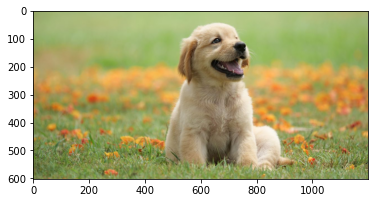

In [37]:
dog_image = cv2.cvtColor(dog_image, cv2.COLOR_BGR2RGB)
plt.imshow(dog_image)

# Drawing on a Picture
There are some ways of drawing on pictures in opencv, like:\
- cv2.rectangle
- cv2.circle
- cv2.line

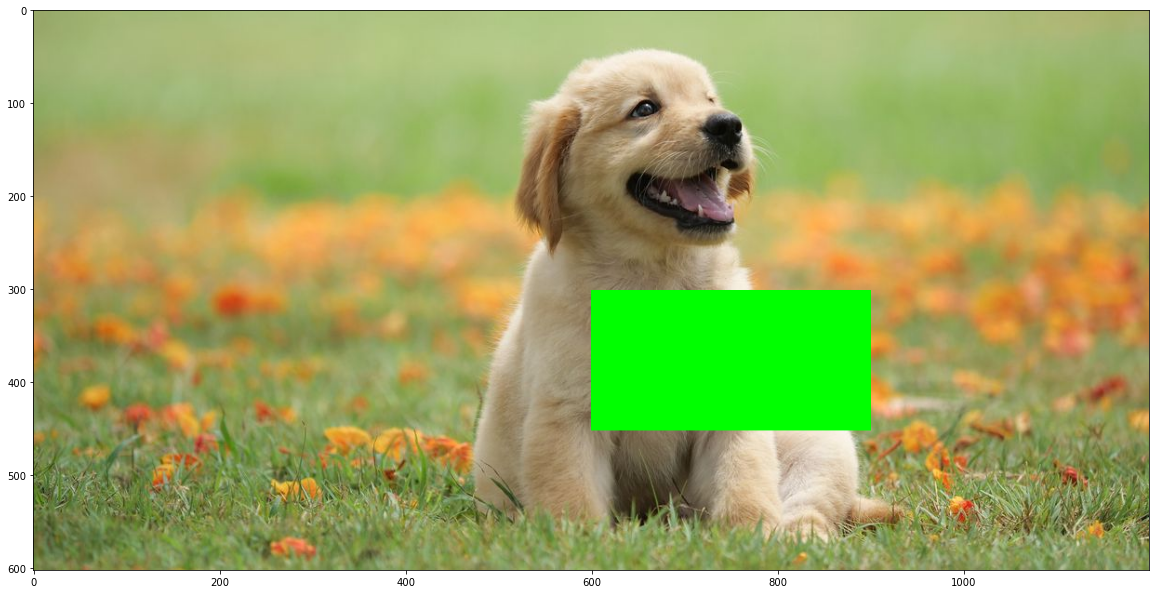

In [38]:

WIDTH = int(dog_image.shape[1])
HEIGHT = int(dog_image.shape[0])


# TOP LEFT CORNER OF RECTANGLE
x1 = WIDTH // 2
y1 = HEIGHT // 2

# WIDTH AND HEIGHT OF THE DRAWN RECTANGLE
w = WIDTH // 4
h = HEIGHT // 4

# BOTTOM RIGHT OF RECTANGLE
x2 = x1+w
y2 = y1+h

cv2.rectangle(dog_image, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=-1)

display_image(dog_image)

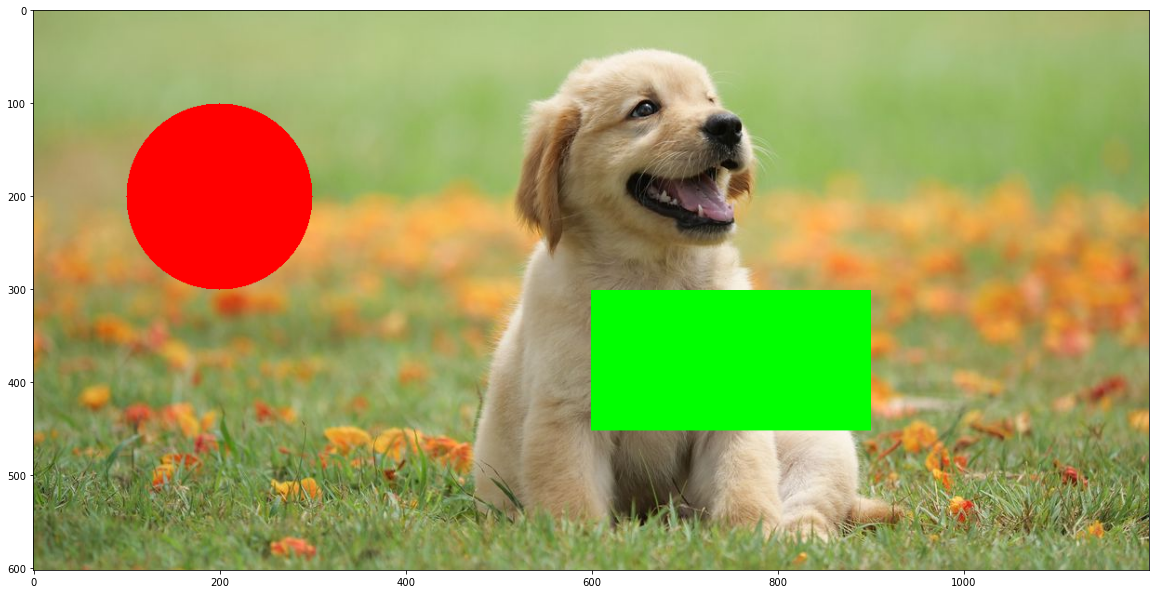

In [57]:
cv2.circle(dog_image, center=(200, 200), radius=100, color=(255, 0, 0), thickness=-1)
display_image(dog_image)

In [35]:

# # CALLBACK FUNCTION TO DRAW RECTANGLE
# def draw_rectangle(event, x, y, flags, param):
#     global pt1, pt2, topLeft_clicked, bottomRight_clicked
    
#     if event == cv2.EVENT_LBUTTONDOWN:
        
#         # DRAW RECTANGLE
#         if not topLeft_clicked:
#             pt1 = (x, y)
#             topLeft_clicked = True
        
#         elif not bottomRight_clicked:
#             pt2 = (x, y)
#             bottomRight_clicked = True
        
#         # DRAW ANOTHER RECTANGLE
#         elif topLeft_clicked and bottomRight_clicked:
#             pt1 = (0, 0)
#             pt2 = (0, 0)
#             topLeft_clicked = False
#             bottomRight_clicked = False
        
# # GLOBAL VARIABLES
# pt1 = (0, 0)
# pt2 = (0, 0)
# topLeft_clicked = False
# bottomRight_clicked = False

# # CONNECT TO THE CALLBACK
# cap = cv2.VideoCapture(0)

# cv2.namedWindow('Camera')
# cv2.setMouseCallback('Camera', draw_rectangle)

# while True:
#     ret, frame = cap.read()
    
#     # DRAW ON THE FRAME
#     if topLeft_clicked:
#         cv2.circle(frame, center=pt1, radius=5, color=(0, 0, 255), thickness=-1)
    
#     if topLeft_clicked and bottomRight_clicked:
#         cv2.rectangle(frame, pt1=pt1, pt2=pt2, color=(0, 255, 0), thickness=4)
        
#     cv2.imshow('Camera', frame)
    
#     k = cv2.waitKey(1)
#     if k == 27:
#         break
        
# cv2.destroyAllWindows()
# cap.release

# Feature Matching, an object detection technique

In [99]:
reeses_path = 'C:\\Users\\Muhammad Tarek\\Downloads\\reeses.jpg'
many_reeses_path = 'C:\\Users\\Muhammad Tarek\\Downloads\\many_reeses.jpg'
reeses = cv2.imread(reeses_path, 0)
many_reeses = cv2.imread(many_reeses_path, 0)

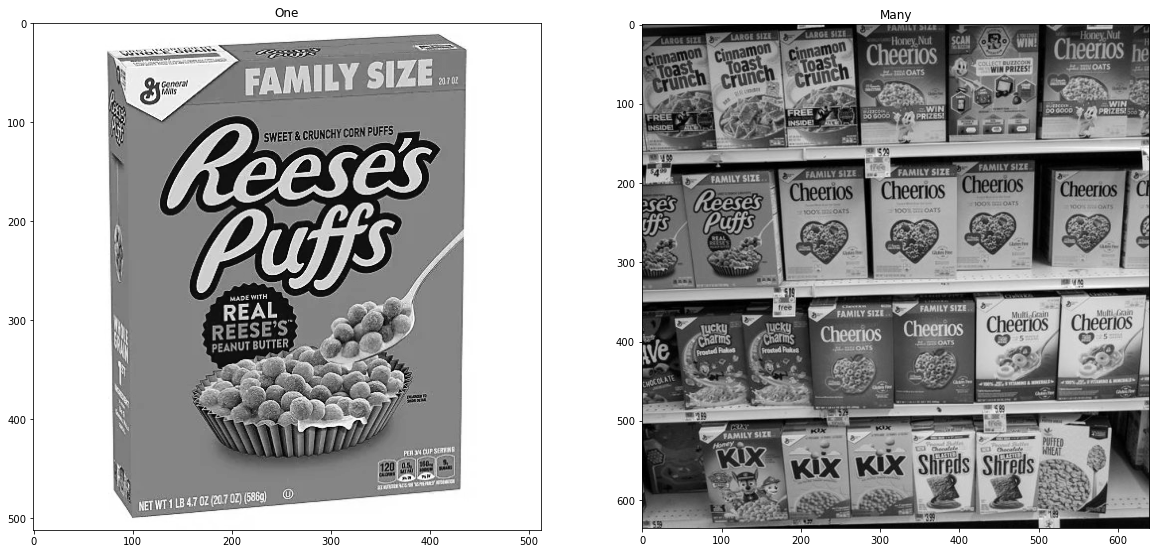

In [100]:
make_fig_gray([reeses, many_reeses], ['One', 'Many'], [1, 2], (20, 10))

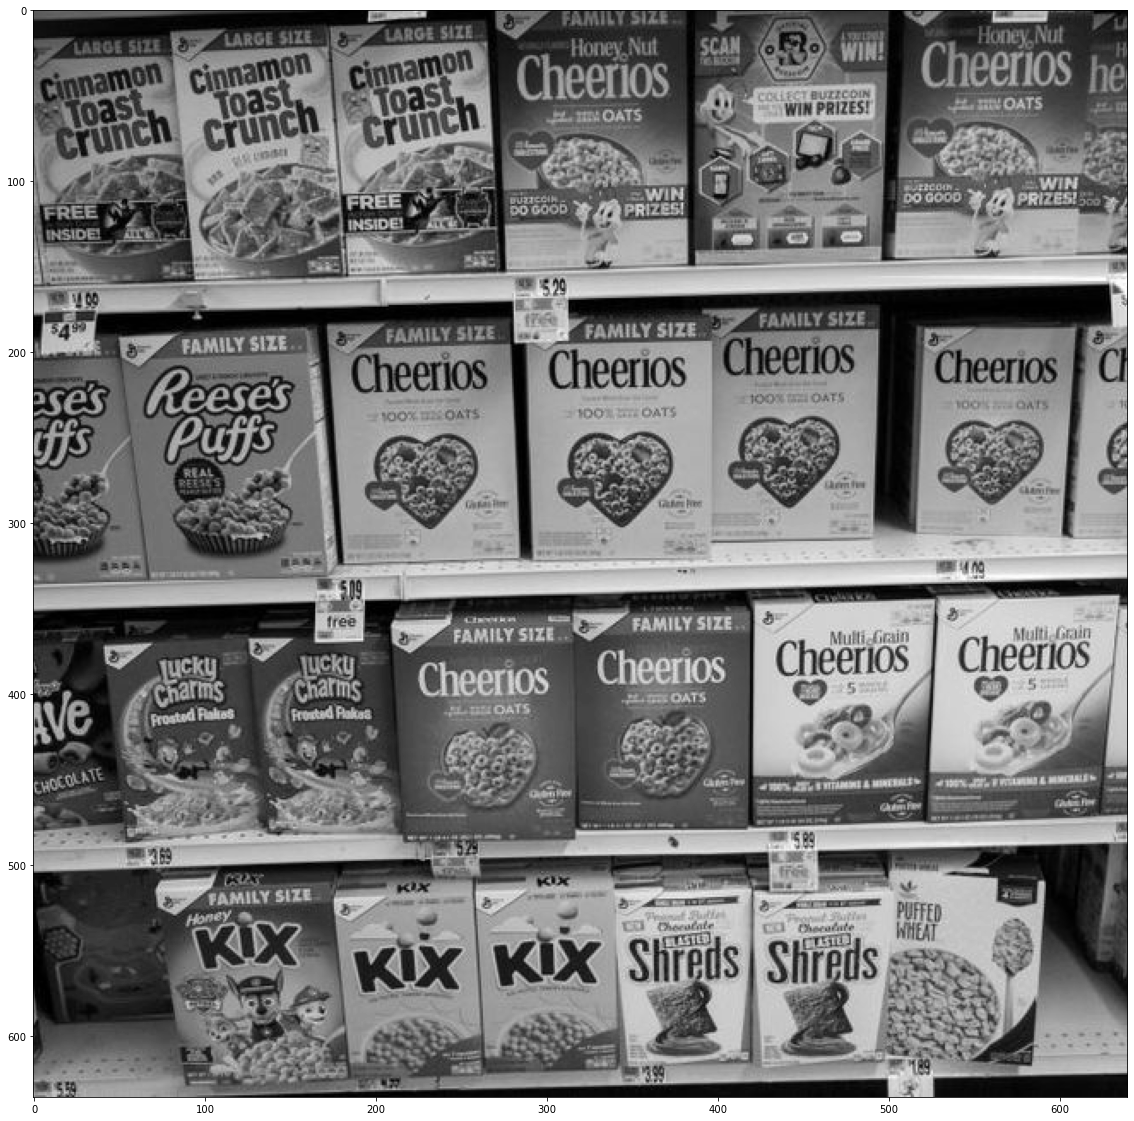

In [101]:
display_image(many_reeses)

# ORB - Orianted-Rotated Brief
ORB is basically a fusion of FAST keypoint detector and BRIEF descriptor with many modifications to enhance the performance. First it use FAST to find keypoints, then apply Harris corner measure to find top N points among them. It also use pyramid to produce multiscale-features. But one problem is that, FAST doesn't compute the orientation

In [169]:
orb = cv2.ORB_create()

In [170]:
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(many_reeses, None)

In [171]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [172]:
matches = bf.match(des1, des2)

In [173]:
matches

[<DMatch 000001B18ADA8050>,
 <DMatch 000001B18ADA86F0>,
 <DMatch 000001B18ADA8510>,
 <DMatch 000001B18ADA88D0>,
 <DMatch 000001B18ADA8710>,
 <DMatch 000001B18ADA8070>,
 <DMatch 000001B18ADA8A10>,
 <DMatch 000001B18ADA8530>,
 <DMatch 000001B18ADA8470>,
 <DMatch 000001B18ADA8590>,
 <DMatch 000001B18ADA8AB0>,
 <DMatch 000001B18ADA83F0>,
 <DMatch 000001B18B2FC490>,
 <DMatch 000001B18B2FC070>,
 <DMatch 000001B18B2FC890>,
 <DMatch 000001B18B2FC850>,
 <DMatch 000001B18B2FC930>,
 <DMatch 000001B18B2FC870>,
 <DMatch 000001B18B2FC3D0>,
 <DMatch 000001B18B2FC790>,
 <DMatch 000001B18B2FC7B0>,
 <DMatch 000001B18B2FC4F0>,
 <DMatch 000001B18B2FC750>,
 <DMatch 000001B18B2FC030>,
 <DMatch 000001B18B2FC770>,
 <DMatch 000001B18B2FC6D0>,
 <DMatch 000001B18B2FC050>,
 <DMatch 000001B18B2FCB50>,
 <DMatch 000001B18B2FCB90>,
 <DMatch 000001B18B2FCB70>,
 <DMatch 000001B18B2FC6B0>,
 <DMatch 000001B18B2FC950>,
 <DMatch 000001B18B2FC450>,
 <DMatch 000001B18B2FCA90>,
 <DMatch 000001B18B2FCA70>,
 <DMatch 000001B18B2

In [174]:
matches[0].distance

70.0

In [175]:
matches = sorted(matches, key=lambda x:x.distance)

In [178]:
reeses_matches = cv2.drawMatches(reeses, kp1, many_reeses, kp2, matches[:25], None, flags=2, matchColor=(0, 255, 0))

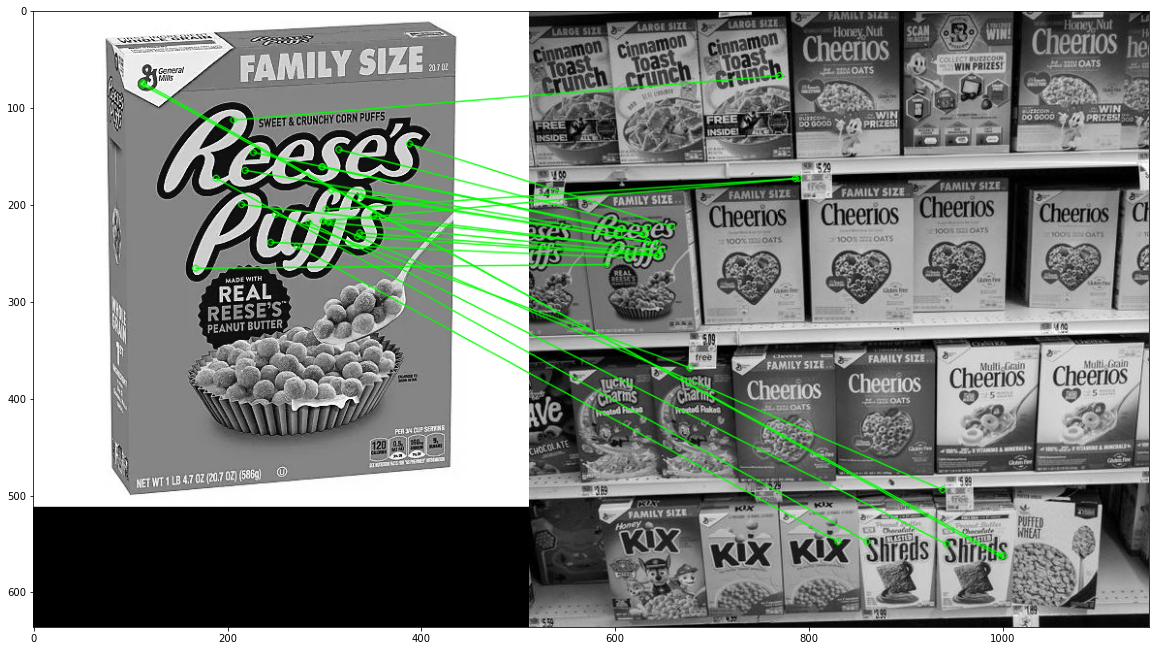

In [179]:
display_image(reeses_matches)

# SIFT - Scale Invariant Feature Transform
SIFT helps locate the local features in an image, commonly known as the ‘keypoints‘ of the image. These keypoints are scale & rotation invariant that can be used for various computer vision applications, like image matching, object detection, scene detection, etc.

We can also use the keypoints generated using SIFT as features for the image during model training. The major advantage of SIFT features, over edge features or hog features, is that they are not affected by the size or orientation of the image.

In [150]:
sift = cv2.xfeatures2d.SIFT_create()

In [151]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(many_reeses, None)

In [152]:
bf = cv2.BFMatcher()

In [153]:
matches = bf.knnMatch(des1, des2, k=2)

In [154]:
print(len(matches))
matches

905


[[<DMatch 000001B18BB9B310>, <DMatch 000001B18BB9B1B0>],
 [<DMatch 000001B1FDC15C70>, <DMatch 000001B1FDC159F0>],
 [<DMatch 000001B1FDC15C30>, <DMatch 000001B18B286CF0>],
 [<DMatch 000001B18B286830>, <DMatch 000001B18B286D30>],
 [<DMatch 000001B18B286BF0>, <DMatch 000001B18B286BD0>],
 [<DMatch 000001B18B286B90>, <DMatch 000001B18B286AF0>],
 [<DMatch 000001B18B286B70>, <DMatch 000001B18B286B10>],
 [<DMatch 000001B18B286AD0>, <DMatch 000001B18B286A10>],
 [<DMatch 000001B18B286A90>, <DMatch 000001B18B286950>],
 [<DMatch 000001B18B286710>, <DMatch 000001B18B2867D0>],
 [<DMatch 000001B18B286790>, <DMatch 000001B18B2869F0>],
 [<DMatch 000001B18B286990>, <DMatch 000001B18B286AB0>],
 [<DMatch 000001B18B286BB0>, <DMatch 000001B18B286B30>],
 [<DMatch 000001B18B286A70>, <DMatch 000001B18B286A50>],
 [<DMatch 000001B18B286A30>, <DMatch 000001B18B2869B0>],
 [<DMatch 000001B18B2869D0>, <DMatch 000001B18B2865F0>],
 [<DMatch 000001B18B286970>, <DMatch 000001B18B286310>],
 [<DMatch 000001B18B2868D0>, <D

In [155]:
good_matches = []

for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good_matches.append([match1])

In [156]:
print(len(good_matches))
good_matches

101


[[<DMatch 000001B18B3B7C30>],
 [<DMatch 000001B18B3B7C70>],
 [<DMatch 000001B18B3B7CB0>],
 [<DMatch 000001B18B3B7CF0>],
 [<DMatch 000001B18B3542F0>],
 [<DMatch 000001B18B354370>],
 [<DMatch 000001B18B3543B0>],
 [<DMatch 000001B18B3544F0>],
 [<DMatch 000001B18B354530>],
 [<DMatch 000001B18B3547B0>],
 [<DMatch 000001B18B354830>],
 [<DMatch 000001B18B3549B0>],
 [<DMatch 000001B18B354B70>],
 [<DMatch 000001B18B354C30>],
 [<DMatch 000001B18B354D70>],
 [<DMatch 000001B18BAFC1F0>],
 [<DMatch 000001B18BAFC230>],
 [<DMatch 000001B18BAFC430>],
 [<DMatch 000001B18BAFC6F0>],
 [<DMatch 000001B18BAFCA30>],
 [<DMatch 000001B18BAFCA70>],
 [<DMatch 000001B18BADF030>],
 [<DMatch 000001B18BADF430>],
 [<DMatch 000001B18BADF870>],
 [<DMatch 000001B18BADF970>],
 [<DMatch 000001B18BADFA30>],
 [<DMatch 000001B18BAE5430>],
 [<DMatch 000001B18BAE5B30>],
 [<DMatch 000001B18BAE5B70>],
 [<DMatch 000001B18BAE5D30>],
 [<DMatch 000001B18BAE5D70>],
 [<DMatch 000001B18BAE5DB0>],
 [<DMatch 000001B18BB0AA70>],
 [<DMatch 

In [157]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, many_reeses, kp2, good_matches, None, flags=2, matchColor=(0, 255, 0))

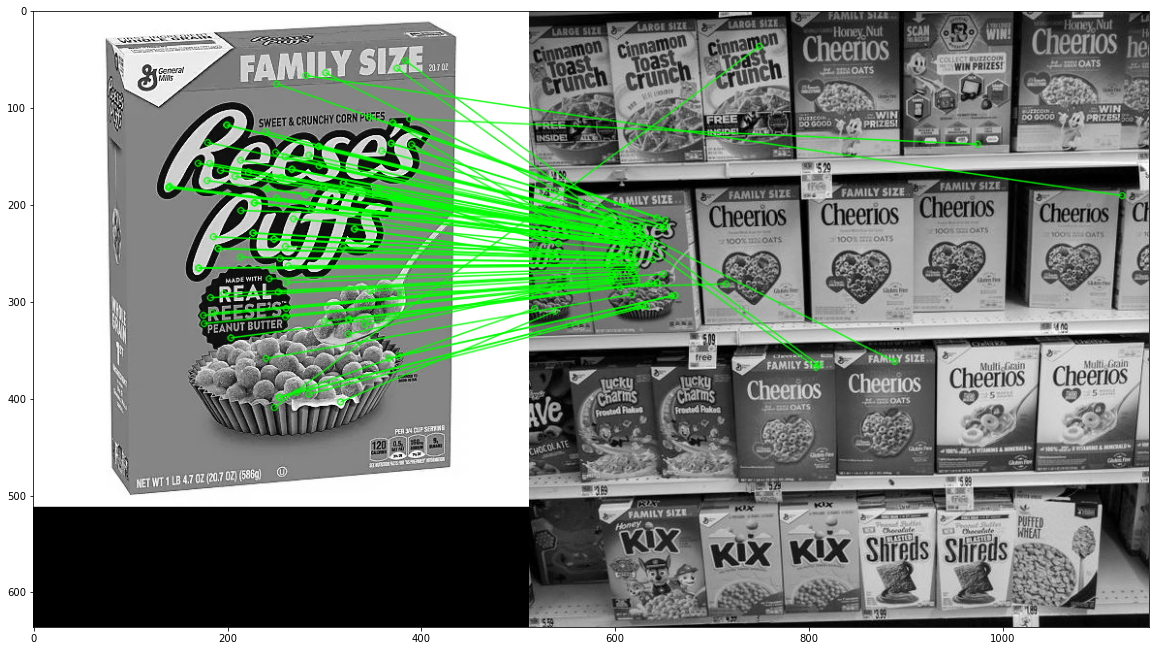

In [158]:
display_image(sift_matches)

# FLANN - Fast Library for Approximate Nearest Neighbours
It's faster than brute force method, but it won't find the BEST matches, just good matches would be fine.

In [159]:
sift = cv2.xfeatures2d.SIFT_create()

In [160]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(many_reeses, None)

In [161]:
FLANN_INDEX_KDTREE = 0
index_params = {'algorithm': FLANN_INDEX_KDTREE, 'tree': 5}
search_params = {'checks': 50}

In [162]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [163]:
matches = flann.knnMatch(des1, des2 ,k=2)

In [164]:
good_matches = []

for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good_matches.append([match1])

In [165]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, many_reeses, kp2, good_matches, None, flags=2, matchColor=(0, 255, 0))

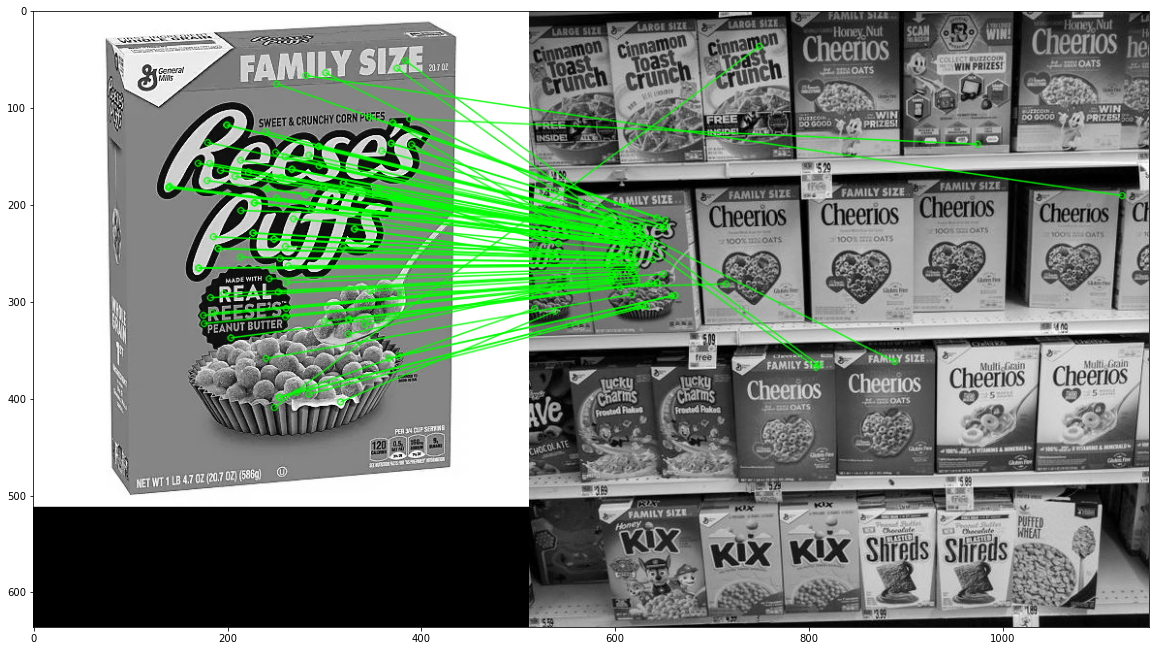

In [166]:
display_image(flann_matches)